# Unit 03

`````{tab-set}
````{tab-item} Objective

::::{important} Objective

The goal of this practical course is to generate 3D structures of different conformers of ethanol.
In detail, xyz-files of two different conformers should be generated starting from the SMILES of ethanol (CCO).


````

````{tab-item} Further Reading

:::{admonition}Further Information
- [`rdkit` package](https://www.rdkit.org/docs/source/rdkit.html)
- [`rdkit.Chem` package](https://www.rdkit.org/docs/source/rdkit.Chem.html)

:::

````
`````

In [1]:
import os, sys
import numpy as np
import pandas as pd

import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import digichem


In [2]:
smi = 'CCO'

## A) Generate 3D Structures - Conformer Ensemble

::::{tip} Task 3.1

Generate 7 different conformers for ethanol. Store the two energetically lowest conformers as *.xyz files.

:::{admonition} Generating 3D structures with RDKIt (ETKDG)
:class: dropdown

The embeddign of a molecule in RDKit is by default performed with EZTKDG, using

```{code-block} python
:lineno-start: 1
:emphasize-lines: 6

from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('C1CCC1OC')
mH = Chem.AddHs(m)
AllChem.EmbedMolecule(mH)
```

Note the calls to Chem.AddHs() in the examples above. By default RDKit molecules do not have H atoms explicitly present in the graph, but they are important for getting realistic geometries, so they generally should be added. 

Subsequently, the embedded geometry can be cleaned up using a force field, e.g. MMFF94 or UFF to minimize an RDKit-generated conformer:

```{code-block} python
:lineno-start: 7

AllChem.MMFFOptimizeMolecule(mH) #MMFF94
AllChem.UFFOptimizeMolecule(mH) # UFF
```

With the RDKit, multiple conformers can also be generated using the different embedding methods. In both cases this is simply a matter of running the distance geometry calculation multiple times from different random start points. The option numConfs allows the user to set the number of conformers that should be generated. Otherwise the procedures are as before. The conformers so generated can be aligned to each other and the RMS values calculated.

```{code-block} python
:lineno-start: 9
:emphasize-lines: 10

# run ETKDG 10 times
cids = AllChem.EmbedMultipleConfs(mH, numConfs=10)
print(len(cids))
> 10
```

You can access the individual mol objects of every conformer by, e.g. to access the mol object of the 3rd conformer, you can use the following code.

```{code-block} python
:lineno-start: 13

mH_c3 = mH.GetConformer(2)
```

To run MMFF94 or UFF on a molecule's confromer ensemble you can use the following functions:

```{code-block} python
:lineno-start: 14

res_mmff94 = AllChem.MMFFOptimizeMoleculeConfs(mH) #MMFF94
res_UFF = AllChem.UFFOptimizeMoleculeConfs(mH) # UFF
```

**Note:** The energies of the conformers are stored in the repective `res_mmff94` or `res_UFF` tuples. If the force field calculation converged the first entry of the tuple is `0`, otherwise it is `1`. The second value in case the computation is converged is the energy in kcal/mol.

**Further Reading:** [Getting started with RDKit - Working with 3D Molecules](https://www.rdkit.org/docs/GettingStartedInPython.html)

:::

:::{admonition} Visualize 3D geometries with py3Dmol
:class: dropdown

You can visualize the geometries of the generated conformers on a grid, using the `viewmol_grid` function imported from digichem.py.

```{code-block} python
:lineno-start: 1
:emphasize-lines: 3

from digichem import viewmol_grid

viewmol_grid(mols=[conf1, conf2, conf3], labels=[label1, label2, label3], ncols=3)
```

The `mols` list should contain RDKit Mol objects. If `labels` are not provided, default labels will be generated automatically (*e.g.*, 'conf1', 'conf2', ...). You can view the full docstring of the function in the JupyterNotebook by running the following line.

```{code-block} python
:lineno-start: 4
:emphasize-lines: 4

viewmol_grid?
```

:::

:::{admonition} Write xyz-files with RDKit
:class: dropdown

You can easily store a RDKit mol object as xyz-file, using the ```rdkit.Chem.MolToXYZFile``` function of rdkit.

```{code-block} python
:lineno-start: 1
:emphasize-lines: 8

from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('C1CCC1OC')
mH = Chem.AddHs(m)
AllChem.EmbedMolecule(mH)

Chem.MolToXYZFile(mH, './practical_course/example.xyz')
```

:::

::::

In [3]:
# create rdkit mol object with explicit H atoms
from rdkit import Chem
from rdkit.Chem import AllChem

smi = 'CCO'
m = Chem.MolFromSmiles(smi)
mH = Chem.AddHs(m)

In [4]:
# function to generate conformers
def generate_conformers(mol, num_confs=10):
    conf_ids = AllChem.EmbedMultipleConfs(mol, numConfs=num_confs, randomSeed=42)
    results = AllChem.MMFFOptimizeMoleculeConfs(mol)
    energies = [result[1] for result in results]
    return mol, energies

mH_confs, energies = generate_conformers(mH, num_confs=7)

energy_indices = sorted(enumerate(energies), key=lambda x: x[1])
lowest_two = [idx for idx, _ in energy_indices[:2]]

In [5]:
# visualize conformers (are they different, in which way?)
from digichem import viewmol

mol_conf1 = Chem.Mol(mH_confs)
mol_conf1.RemoveAllConformers()
mol_conf1.AddConformer(mH_confs.GetConformer(lowest_two[0]))
viewmol(mol_conf1)

mol_conf2 = Chem.Mol(mH_confs)
mol_conf2.RemoveAllConformers()
mol_conf2.AddConformer(mH_confs.GetConformer(lowest_two[1]))
viewmol(mol_conf2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Write xyz file
for i, conf_idx in enumerate(lowest_two, start=1):
    filename = f'ethanol_conformer_{i}.xyz'
    Chem.MolToXYZFile(mH_confs, filename, confId=conf_idx)

::::{tip} Task 3.2

Generate the **Coulomb Matrix** of two *conformers* of **ethanol**.
Plot the matrices and compare. How are the different conformers reflected in the matrix?

:::{note}
:class: dropdwon
Make sure that both conformers have the same ordering of atoms, or use the sorted Coulomb matrix. 
:::

:::{admonition} Creating conformers from a graph with RDKit
:class: dropdown

If the molecule does not have any conformers, one first has to add hydrogen atoms and subsequently embed the molecule
using a force field (ETKDG) to generate 3D structural information. When one is interested in getting the structures of different conformers, one has to perform multiple embeddings and structure optimizations, and then keep the unique entries from the results. Usually, one is interested in the two energetically lowest isomers.
This can be realized by using the followign python code:

```{code-block} python
:lineno-start: 13
:emphasize-lines: 17, 20

ethanol = rdkit.Chem.MolFromSmiles('CCO')
ethanol_H = rdkit.Chem.AddHs(ethanol)
AllChem.EmbedMolecule(ethanol_H, AllChem.ETKDG())

rdkit.Chem.AllChem.EmbedMultipleConfs(ethanol_H, numConfs=10, params=AllChem.ETKDG())
results_UFF = AllChem.UFFOptimizeMoleculeConfs(ethanol_H, maxIters=10000)

results_sorted = sorted(results_UFF)

conformers = []
for (i, energy) in results_sorted:
    mol_copy = rdkit.Chem.Mol(ethanol_H)
    mol_copy.RemoveAllConformers()
    mol_copy.AddConformer(ethanol_H.GetConformer(i), assignId=True)
    conformers.append((energy, mol_copy))
```

:::

:::{admonition} Drawing RDKit Mol Objects with atom indices
:class: dropdown

The RDKit drawing code has a lot of options that can be changed to tune/tweak the way the drawing is done.
An overview can be found here: https://greglandrum.github.io/rdkit-blog/posts/2023-05-26-drawing-options-explained.html
To visualize the RDKit Mol Object with highlighting the atom indices, you can use the following python code:

```{code-block} python
:lineno-start: 28
:emphasize-lines: 32

from PIL import Image
from io import BytesIO

def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
```

:::

::::

In [7]:
# Generate Coulomb matrices for the two lowest energy conformers


mol_conf1 = Chem.Mol(mH_confs)
mol_conf1.RemoveAllConformers()
mol_conf1.AddConformer(mH_confs.GetConformer(lowest_two[0]))

mol_conf2 = Chem.Mol(mH_confs)
mol_conf2.RemoveAllConformers()
mol_conf2.AddConformer(mH_confs.GetConformer(lowest_two[1]))

Z1, cm1 = digichem.get_coulomb_matrix(mol_conf1, sortedCM=True, redundant=True)
Z2, cm2 = digichem.get_coulomb_matrix(mol_conf2, sortedCM=True, redundant=True)

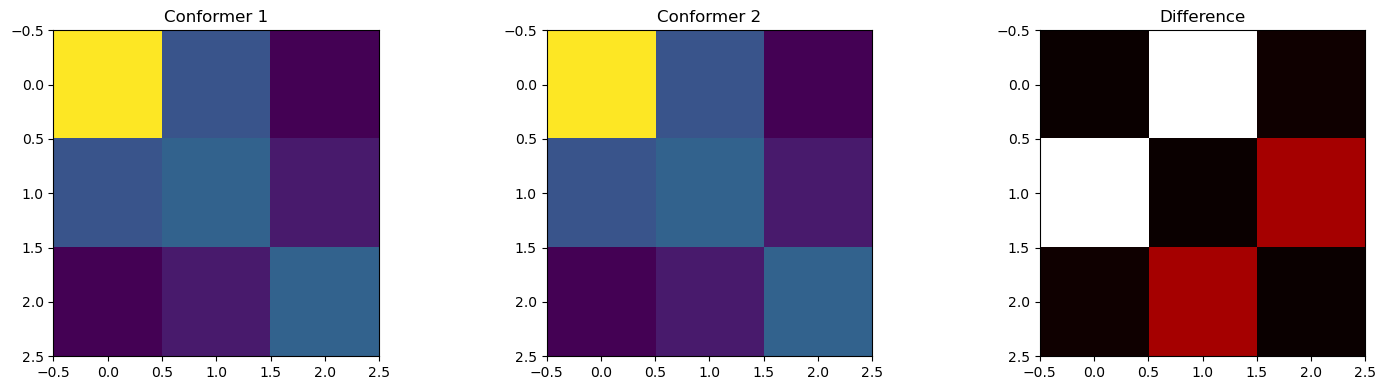

In [8]:
# Plot and compare the Coulomb matrices
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(cm1, cmap='viridis')
axes[0].set_title('Conformer 1')

axes[1].imshow(cm2, cmap='viridis')
axes[1].set_title('Conformer 2')

axes[2].imshow(np.abs(cm1 - cm2), cmap='hot')
axes[2].set_title('Difference')

plt.tight_layout()
plt.show()